# 05 衡量回归算法的标准, MSE vs MAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [2]:
boston = datasets.load_boston()
x = boston.data[:, 5]
y = boston.target

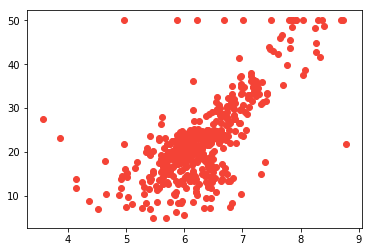

In [3]:
plt.scatter(x, y, color="#f44336")
plt.show()

In [4]:
x = x[y < 50]
y = y[y < 50]

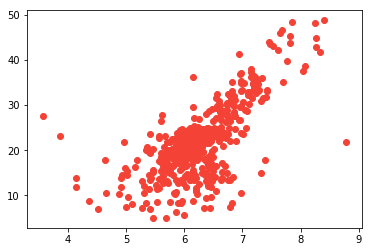

In [5]:
plt.scatter(x, y, color="#f44336")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

In [7]:
from playML.SimpleLinearRegression import SimpleLinearRegression
slr = SimpleLinearRegression()
slr.fit(x_train, y_train)
y_predict = slr.predict(x_test)

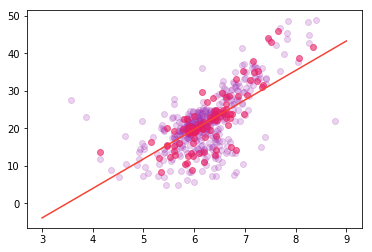

In [8]:
cx = np.linspace(3, 9, 61)
cy = slr.predict(cx)

plt.scatter(x_train, y_train, color="#9c27b0", alpha="0.2")
plt.scatter(x_test, y_test, color="#e91e63", alpha="0.6")
plt.plot(cx, cy, color="#f44336")
plt.show()

In [9]:
print(slr.a_)
print(slr.b_)

7.86085435627
-27.4593428067


对于简单的线性回归, 目标是使 $\displaystyle \sum_{i=1}^{m}\left(y_{\rm train}^{(i)} - ax_{\rm train}^{(i)} - b\right)^2$ 尽可能小<br>
衡量标准: $\displaystyle \sum_{i=1}^{m}\left(y_{\rm test}^{(i)} - \hat{y}_{\rm test}^{(i)}\right)^2$<br>
问题: $\displaystyle \sum_{i=1}^{m}\left(y_{\rm test}^{(i)} - \hat{y}_{\rm test}^{(i)}\right)^2$ 与 $m$ 相关

#### MSE(Mean Squared Error)
$$
MSE = \frac{1}{m} \sum_{i=1}^{m}\left(y_{\rm test}^{(i)} - \hat{y}_{\rm test}^{(i)}\right)^2
$$
问题: 有量纲问题

In [10]:
mse = np.mean((y_test - y_predict) ** 2)
mse

24.156602134387427

#### RMSE(Root Mean Squared Error)
$$
RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(y_{\rm test}^{(i)} - \hat{y}_{\rm test}^{(i)}\right)^2} = \sqrt{MSE}
$$

In [11]:
# rmse = np.linalg.norm(y_test - y_predict) / np.sqrt(y_test.size)
rmse = np.sqrt(np.mean((y_test - y_predict) ** 2))
rmse

4.914936635846634

#### MAE(Mean Absolute Error)
$$
MAE = \frac{1}{m} \sum_{i=1}^{m}\left|y_{\rm test}^{(i)} - \hat{y}_{\rm test}^{(i)}\right|
$$

In [12]:
# mae = np.linalg.norm(y_test - y_predict, 1) / y_test.size
mae = np.mean(np.absolute(y_test - y_predict))
mae

3.5430974409463865

#### 封装我们自己的评测函数

In [13]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

print(mean_squared_error(y_test, y_predict))
print(root_mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

24.1566021344
4.91493663585
3.54309744095


#### scikit-learn中的MSE和MAE

In [14]:
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, y_predict))
# print(root_mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

24.1566021344
3.54309744095
